In [4]:
from scipy.io import wavfile

In [5]:
import utility as util

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import thinkdsp

# Primul fisier audio.

In [82]:
gun_shot=thinkdsp.read_wave('gun_shot.wav')
gun_shot.make_audio()

rata esantionare = 44100 Hz, lungime = 203664 esantioane, canale = 2
[[ 93  22]
 [ 95  22]
 [ 96  17]
 ...
 [  4 -16]
 [ -1 -12]
 [  4 -12]]


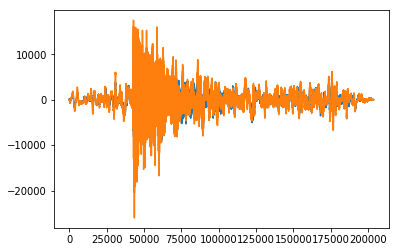

In [43]:
samp_gun, gun=wavfile.read('gun_shot.wav')
print('rata esantionare = {} Hz, lungime = {} esantioane, canale = {}'.format(samp_gun, *gun.shape))
print(gun)
plt.plot(gun)

Pentru a putea prelucra semnalul trebuie sa transformam esantioanele in numere reale din numere intregi si sa-l normalizam, adica amplitudinea esantioanelor sa fie intre -1 si 1.

old dtype: int16
new dtype: float32
[[ 2.838e-03  6.714e-04]
 [ 2.899e-03  6.714e-04]
 [ 2.930e-03  5.188e-04]
 ...
 [ 1.221e-04 -4.883e-04]
 [-3.052e-05 -3.662e-04]
 [ 1.221e-04 -3.662e-04]]


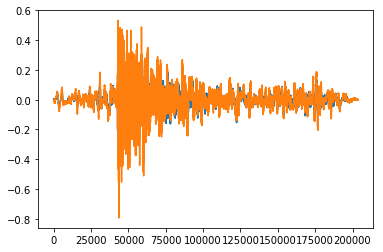

In [83]:
print("old dtype: {}".format(gun.dtype))
normalized_gun = util.pcm2float(gun, 'float32')
print("new dtype: {}".format(normalized.dtype))
np.set_printoptions(precision=3)
print(normalized_gun)
plt.plot(normalized_gun);

# Al doilea fisier audio.

In [84]:
violin=thinkdsp.read_wave('violin.wav')
violin.make_audio()

rata esantionare = 44100 Hz, lungime = 373374 esantioane, canale = 2
[[-13 -35]
 [ -5 -19]
 [ 12 -16]
 ...
 [  2  -3]
 [ -1   4]
 [ -1  -4]]


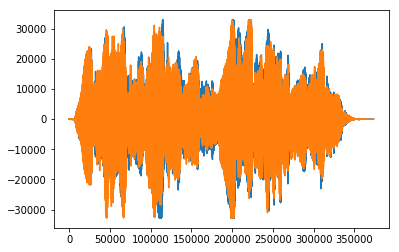

In [85]:
samp_violin, violin=wavfile.read('violin.wav')
print('rata esantionare = {} Hz, lungime = {} esantioane, canale = {}'.format(samp_violin, *violin.shape))
print(violin)
plt.plot(violin)

old dtype: int16
new dtype: float32
[[-3.967e-04 -1.068e-03]
 [-1.526e-04 -5.798e-04]
 [ 3.662e-04 -4.883e-04]
 ...
 [ 6.104e-05 -9.155e-05]
 [-3.052e-05  1.221e-04]
 [-3.052e-05 -1.221e-04]]


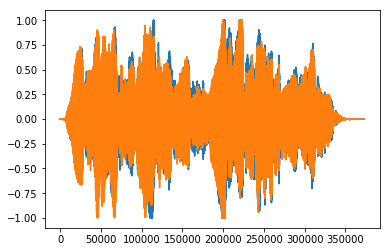

In [86]:
print("old dtype: {}".format(violin.dtype))
normalized_violin = util.pcm2float(violin, 'float32')
print("new dtype: {}".format(normalized_violin.dtype))
np.set_printoptions(precision=3)
print(normalized_violin)
plt.plot(normalized_violin)

Cele doua semnale audio sunt in format dual channel. De aceea in lista esantioanelor sunt perechi de liste, primul element dintr-o pereche fiind esantionul pentru canalul 1, iar al doilea element pentru canalul 2. Pentru a putea face convolutia trebuie sa extragem elementele din lista de liste pentru a face cate o lista pentru fiecare canal, iar apoi facem convolutia, pe rand, pentru fiecare canal.

In [87]:
norm_gun_ch1=[el[0] for el in normalized_gun]
norm_gun_ch2=[el[1] for el in normalized_gun]
print(norm_gun_ch1[:10],'\n',norm_gun_ch2[:10])

[0.0028381348, 0.00289917, 0.0029296875, 0.0027770996, 0.0028076172, 0.0027160645, 0.0025939941, 0.0025939941, 0.0025634766, 0.0026245117] 
 [0.0006713867, 0.0006713867, 0.0005187988, 0.00064086914, 0.000579834, 0.0007019043, 0.00061035156, 0.0005187988, 0.00061035156, 0.000579834]


In [88]:
norm_violin_ch1=[el[0] for el in normalized_violin]
norm_violin_ch2=[el[1] for el in normalized_violin]
print(norm_violin_ch1[:10],'\n',norm_violin_ch2[:10])

[-0.00039672852, -0.00015258789, 0.00036621094, -0.0004272461, -0.00033569336, -0.0009460449, -0.0006713867, -0.0006713867, 0.00076293945, 0.00064086914] 
 [-0.0010681152, -0.000579834, -0.00048828125, -0.000579834, -0.0011901855, -0.0009765625, -0.0013427734, -0.0006713867, 0.00039672852, 0.0005493164]


Convolutia pentru primul canal.

[-1.126e-06 -1.583e-06 -5.653e-07 ...  4.657e-09 -2.794e-09 -3.725e-09]


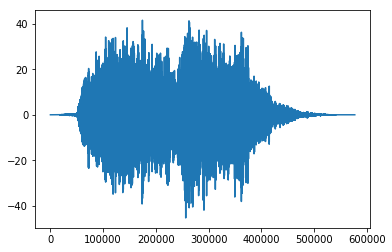

In [57]:
conv_sign_ch1= np.convolve(norm_violin_ch1,norm_gun_ch1,'full')
print(conv_sign_ch1)
plt.plot(conv_sign_ch1)

Convolutia pentru al doilea canal.

[-7.171e-07 -1.106e-06 -1.271e-06 ...  4.843e-08  0.000e+00  4.470e-08]


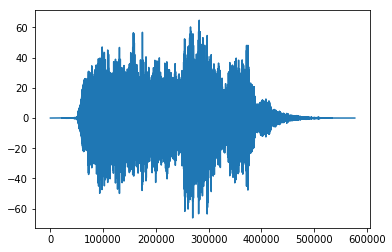

In [59]:
conv_sign_ch2= np.convolve(norm_violin_ch2,norm_gun_ch2,'full')
print(conv_sign_ch2)
plt.plot(conv_sign_ch2)

Dupa ce am facut convolutia pentru fiecare semnal in parte, revenim la formatul initial, cel de lista de liste.

[[-1.125969e-06, -7.171184e-07], [-1.5832484e-06, -1.1064112e-06], [-5.653128e-07, -1.2712553e-06], [-1.6996637e-06, -1.7024577e-06], [-2.656132e-06, -2.4326146e-06], [-5.398877e-06, -3.1543896e-06], [-7.2335824e-06, -3.8882717e-06], [-9.185635e-06, -4.2086467e-06], [-6.941147e-06, -3.854744e-06], [-4.9592927e-06, -3.5557896e-06]]


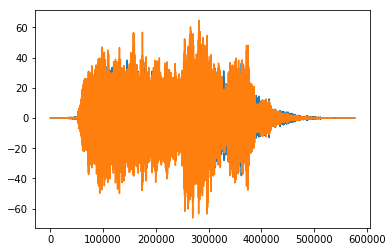

In [89]:
conv_sign=[[ch1,ch2] for ch1,ch2 in zip(conv_sign_ch1,conv_sign_ch2)]
print(conv_sign[:10])
plt.plot(conv_sign)

Salvam convolutia celor doua semnale intr-un fisier .wav.

In [76]:
conv_audio=np.array(conv_sign, dtype='int16')
audio=wavfile.write('conv-audio.wav', 44100, conv_audio)

# Rezultatul convolutiei.

In [77]:
audio_o=thinkdsp.read_wave('conv-audio.wav')
audio_o.make_audio()

Bibliografie:
https://nbviewer.jupyter.org/github/mgeier/python-audio/blob/master/audio-files/audio-files-with-scipy-io.ipynb
https://www.youtube.com/watch?v=0ALKGR0I5MA&t=583s
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.convolve.html